In [10]:
###import the data ###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('./UCI_Credit_Card.csv')
data.head()
print(data.shape)

(30000, 25)


In [3]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
###target varaible explore and distribution###
next_month=data['default.payment.next.month'].value_counts()
print(next_month)
type(next_month)

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


pandas.core.series.Series

In [8]:
df=pd.DataFrame({'default.payment.next.month':next_month.index,'values':next_month.values})
df

,default.payment.next.month,values
0,0,23364
1,1,6636


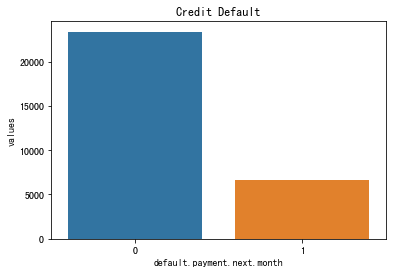

In [12]:
plt.title('Credit Default')
sns.barplot(x='default.payment.next.month',y='values',data=df)
plt.show()

In [18]:
# data.drop(['ID'],inplace=True,axis=1)
target=data['default.payment.next.month'].values
columns=data.columns.tolist()
columns.remove('default.payment.next.month')
print(columns)
features=data[columns].values

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [19]:
features

array([[2.0000e+04, 2.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.2000e+05, 2.0000e+00, 2.0000e+00, ..., 1.0000e+03, 0.0000e+00,
        2.0000e+03],
       [9.0000e+04, 2.0000e+00, 2.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        5.0000e+03],
       ...,
       [3.0000e+04, 1.0000e+00, 2.0000e+00, ..., 4.2000e+03, 2.0000e+03,
        3.1000e+03],
       [8.0000e+04, 1.0000e+00, 3.0000e+00, ..., 1.9260e+03, 5.2964e+04,
        1.8040e+03],
       [5.0000e+04, 1.0000e+00, 2.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        1.0000e+03]])

In [32]:
###test train data cut###
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y=train_test_split(features,target,test_size=0.3)

In [34]:
###model selection ###
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#构造各种分类器#
classifiers=[SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
#分类器名称#
classifier_names=['svc','decisiontreeclassifier','randomforestclassifier','kneighborsclassifier']
#分类器参数#
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy'):
    gridsearch=GridSearchCV(estimator=pipeline,param_grid=model_param_grid,scoring=score)
    search=gridsearch.fit(train_x, train_y)
    print('GridSearchCV最优参数：',search.best_params_)
    print('GridSearchCV最优分数：',search.best_score_)
    predict_y=gridsearch.predict(test_x)
    print('准确率 %0.4lf'%accuracy_score(test_y,predict_y))
    
    response={}
    response['predict_y']=predict_y
    response['accuracy_score']=accuracy_score(test_y,predict_y)
    
    return response
    
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')



GridSearchCV最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearchCV最优分数： 0.8175714285714285
准确率 0.8166
GridSearchCV最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearchCV最优分数： 0.8202857142857141
准确率 0.8137
GridSearchCV最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearchCV最优分数： 0.7961904761904762
准确率 0.7960
GridSearchCV最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearchCV最优分数： 0.8039047619047619
准确率 0.8067
